In [95]:
import tensorflow as tf
import json
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [96]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [97]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [98]:
sentences = df.headline.values

In [99]:
labels = df.is_sarcastic.values

In [100]:
# Splitting into train and test datasets
training_sentences = sentences[0:20000]
testing_sentences = sentences[20000:]

training_labels = labels[0:20000]
testing_labels = labels[20000:]


## Tokenizing

In [101]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sentences, padding='post', truncating='post', maxlen=100)



testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, padding='post', truncating='post', maxlen=100)

In [102]:
# Covert into a array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [103]:
vocab_size = 10000
embeddinf_dim = 16

In [104]:
# Building Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embeddinf_dim,input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
   
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [105]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded,testing_labels),
                   verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6589 - accuracy: 0.6330 - val_loss: 0.5408 - val_accuracy: 0.8120 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4165 - accuracy: 0.8377 - val_loss: 0.3863 - val_accuracy: 0.8264 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3113 - accuracy: 0.8774 - val_loss: 0.3409 - val_accuracy: 0.8540 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2617 - accuracy: 0.8968 - val_loss: 0.3338 - val_accuracy: 0.8562 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2267 - accuracy: 0.9145 - val_loss: 0.3361 - val_accuracy: 0.8557 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 3s - loss: 0.2022 - accuracy: 0.9227 - val_loss: 0.3526 - val_accuracy: 0.8445 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1798 - accuracy: 0.9347 - val_loss: 0.3490 - val_accuracy: 0.8528 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1621 - accuracy: 0.9408 - val_loss: 0.3654 - val_accuracy: 0.8481 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 2s 

In [108]:
import matplotlib.pyplot as plt

def plot_graph(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], "")
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [109]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels)

print('test loss: ', test_loss)
print('test acc: ', test_acc)

270/270 [==============================] - 1s 2ms/step - loss: 1.0969 - accuracy: 0.8064
test loss:  1.0969462394714355
test acc:  0.8063580393791199


(0.0, 1.1504033980891109)

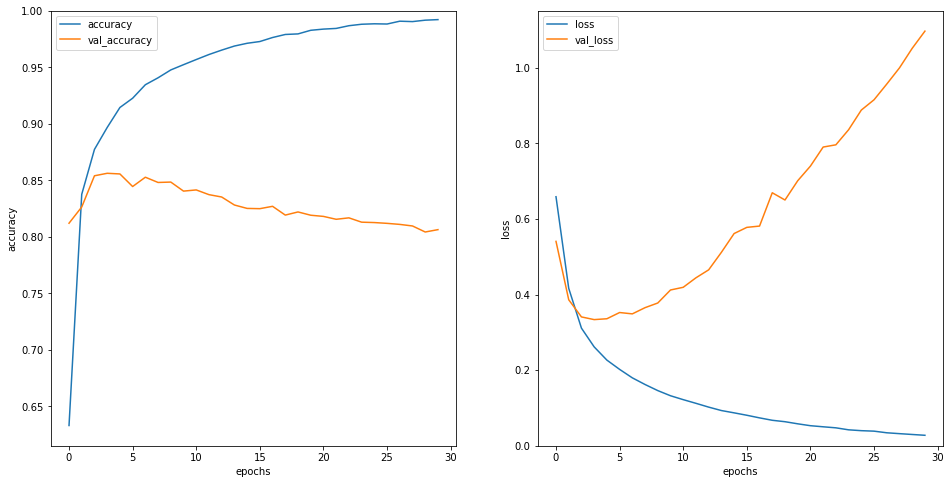

In [110]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graph(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graph(history, 'loss')
plt.ylim(0, None)

In [112]:
## Prediction 
sentence = ["granny starting to fear spiders in the garden might be real",
          "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen = 100, padding='post', truncating ='post')
print(model.predict(padded))

[[6.9589663e-01]
 [1.6034418e-08]]
